# Optimización flujo trabajo en un almacén con Q-Learning

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

sns.set(rc={'figure.figsize':(10, 5)})

## Hyperparametros para Q-Learning

Hay 2 hyperparametros principales en la fórmula
- $\alpha$
- $\gamma$



In [13]:
#Hyperparametros
gamma = 0.75
alpha = 0.9

## Definición del entorno

### Definición de los estados

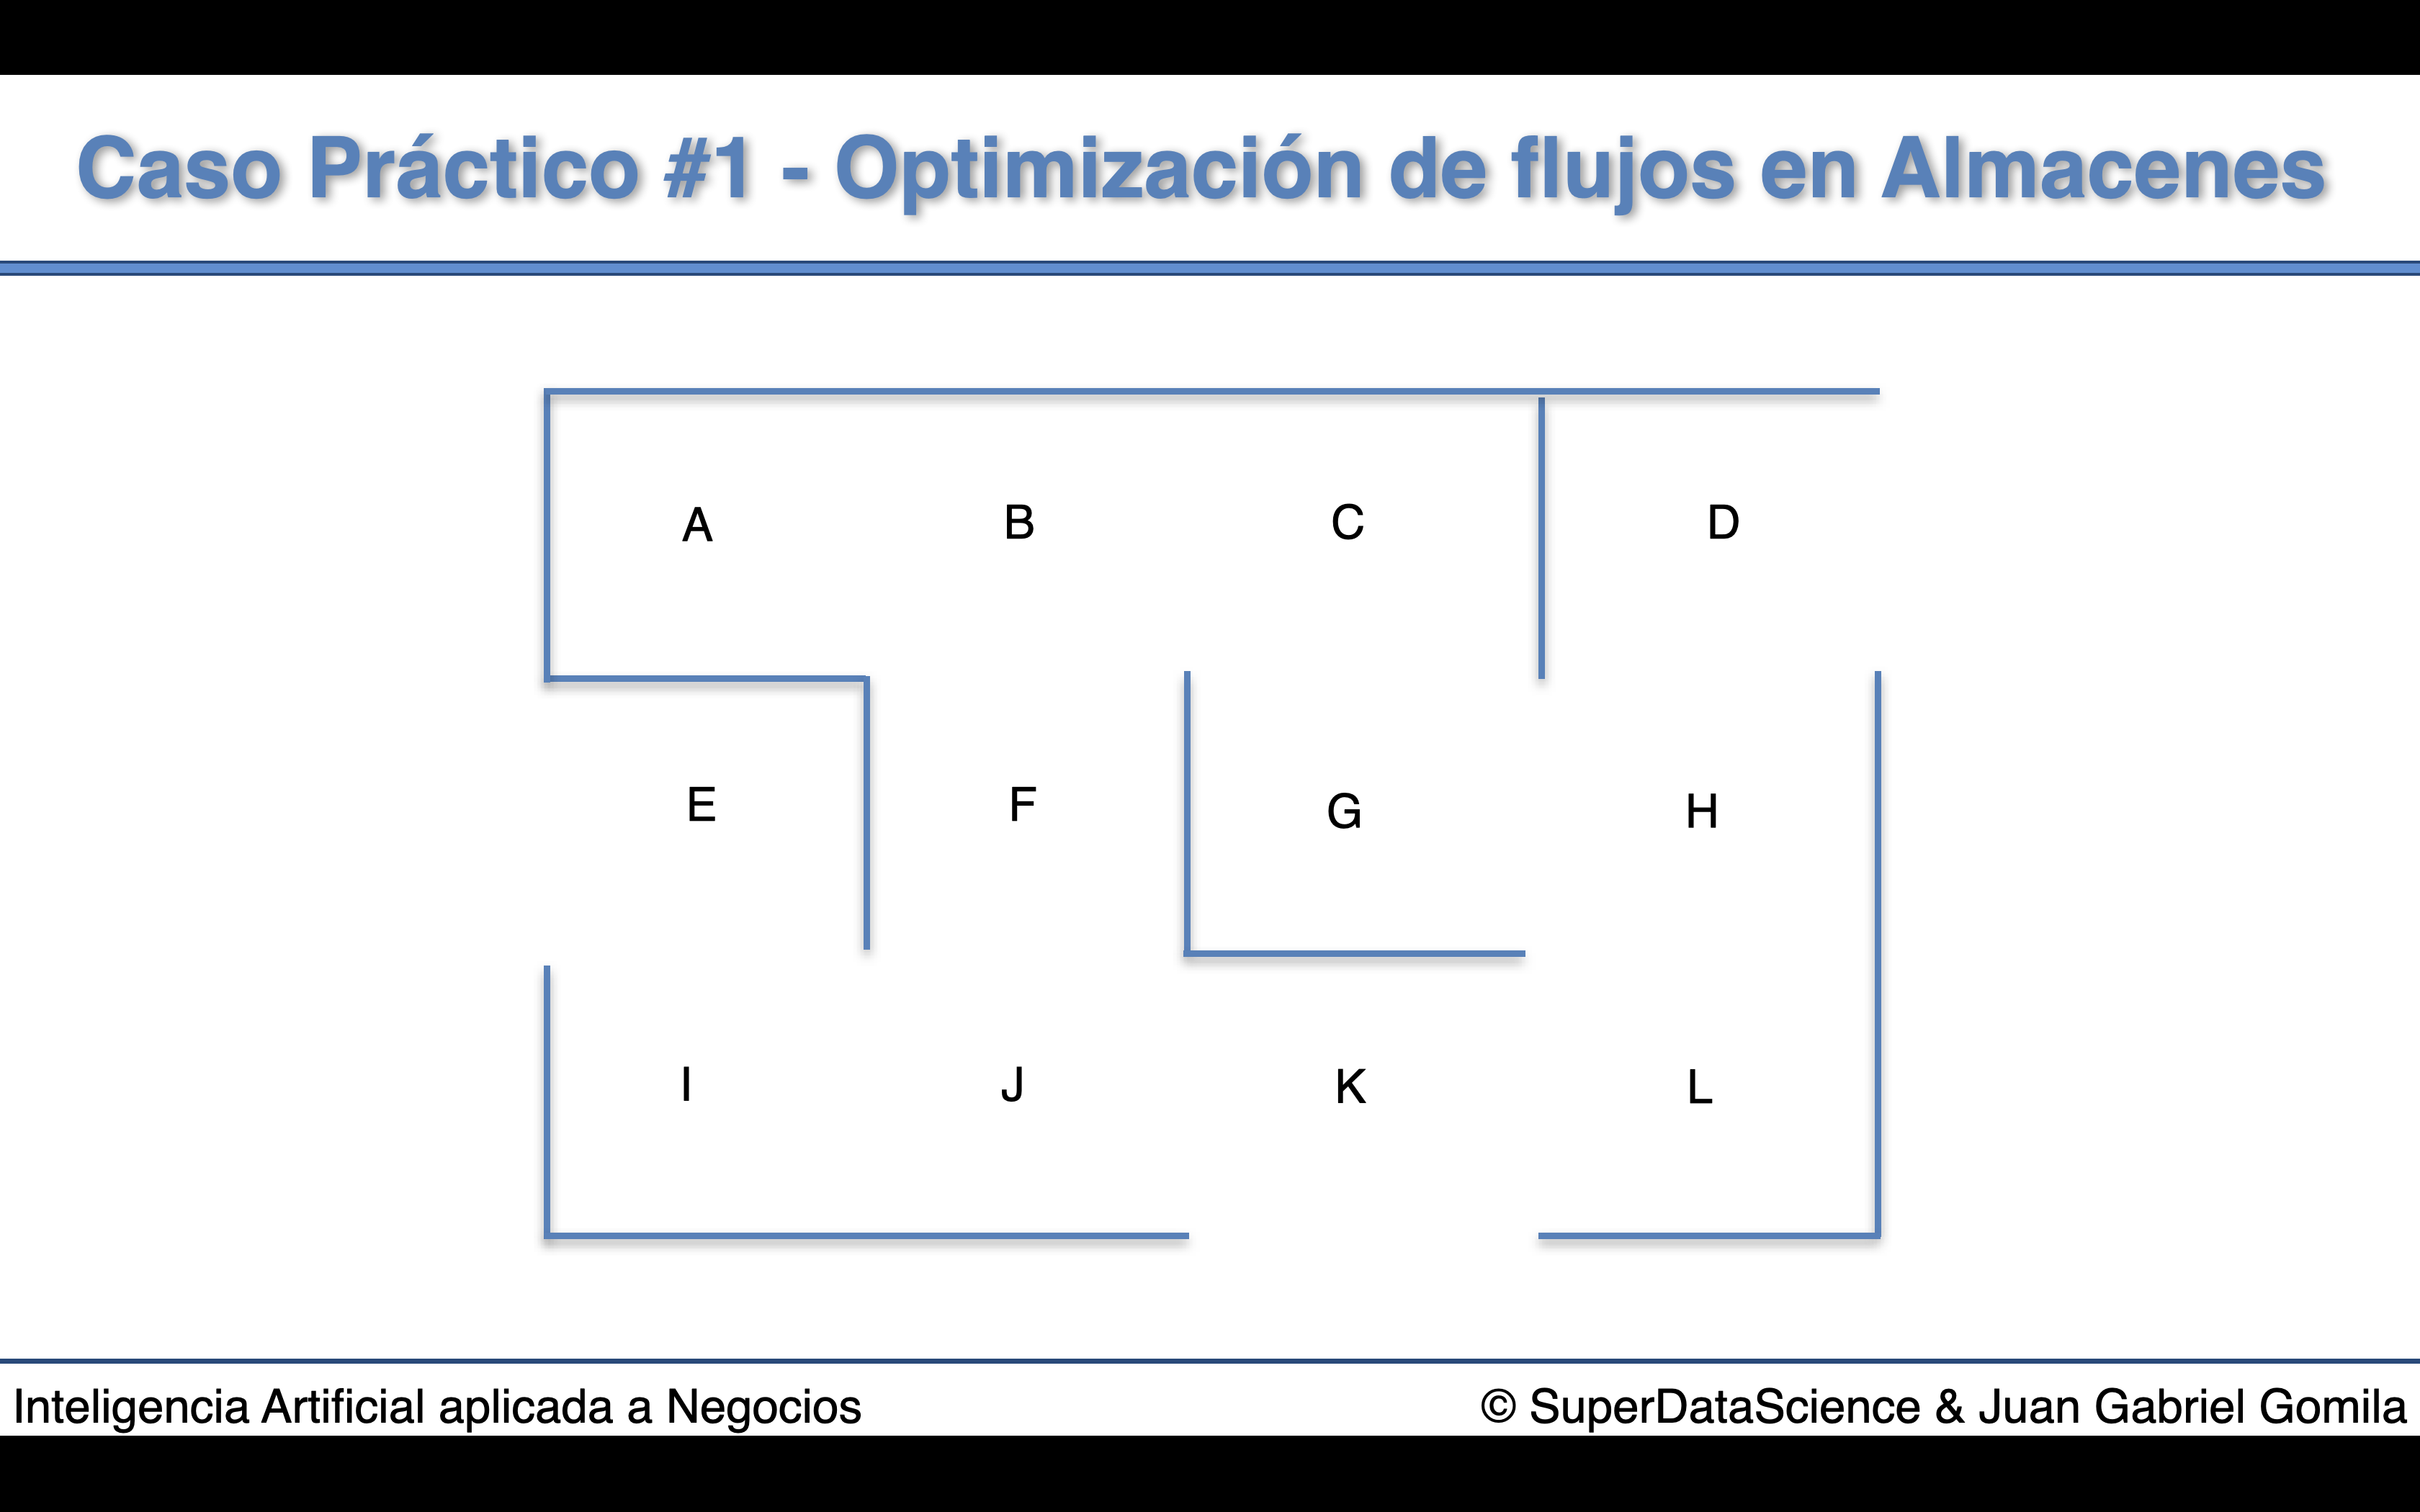

In [14]:
#Diccionario de localizaciones de letras a números
location_to_state = {
    'A':0,
    'B':1,
    'C':2,
    'D':3,
    'E':4,
    'F':5,
    'G':6,
    'H':7,
    'I':8,
    'J':9,
    'K':10,
    'L':11
}

#Definición acciones
actions = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]

#Definición de las recompensas
#    A,B,C,D,E,F,G,H,I,J,K,L
raw_matrix = [
    [0,1,0,0,0,0,0,0,0,0,0,0], #A
    [1,0,1,0,0,1,0,0,0,0,0,0], #B
    [0,1,0,0,0,0,1,0,0,0,0,0], #C
    [0,0,0,0,0,0,0,1,0,0,0,0], #D
    [0,0,0,0,0,0,0,0,1,0,0,0], #E
    [0,1,0,0,0,0,0,0,0,1,0,0], #F
    [0,0,1,0,0,0,1000,1,0,0,0,0], #G
    [0,0,0,1,0,0,1,0,0,0,0,1], #H
    [0,0,0,0,1,0,0,0,0,1,0,0], #I
    [0,0,0,0,0,1,0,0,1,0,1,0], #J
    [0,0,0,0,0,0,0,0,0,1,0,1], #K
    [0,0,0,0,0,0,0,1,0,0,1,0], #L
]
#Convertimos a array de numpy para cálculos con matrices
R = np.array(raw_matrix)

In [23]:
# Diccionario inverso para estados
state_to_location = {state: location for location,state in location_to_state.items()}
print(state_to_location)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L'}


## Construcción de la solución de IA con Q-Learning
### Inicialización de los valores Q

In [15]:
Q = np.zeros([12,12])
Q

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Implementación del proceso de Q-Learning

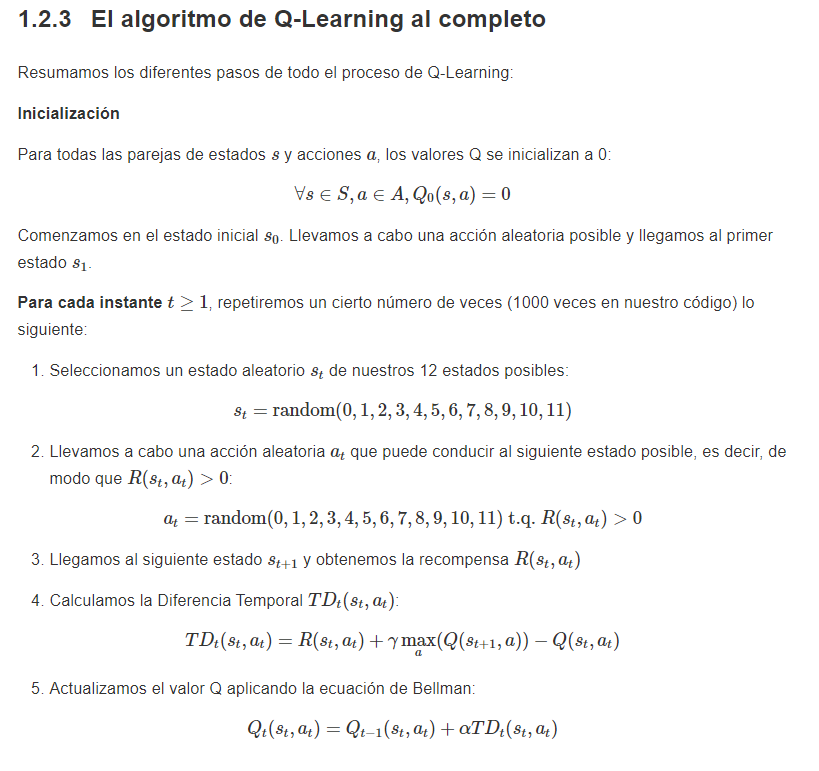

In [24]:
# Para cada instante t>=1 repeterimes cierto número de veces (1000 en nuestro códgio)
for i in range(1000):
    # Seleccionar un estado aleatorio s_1 de nuestros estados posibles (12)
    current_state = np.random.randint(0,12)
    # Acción aleatoria a_t que puede conducir al siguiente estado posible recompensa positiva
    playable_actions = []
    for j in range(R.shape[0]):
        if R[current_state, j] > 0:
            playable_actions.append(j)
    next_state = np.random.choice(playable_actions)
    # Calcular la diferencia temporal
    TD = R[current_state, next_state] + (
        gamma*Q[next_state, np.argmax(Q[next_state,:])] - Q[current_state, next_state])
    Q[current_state, next_state] = Q[current_state, next_state] + alpha*TD

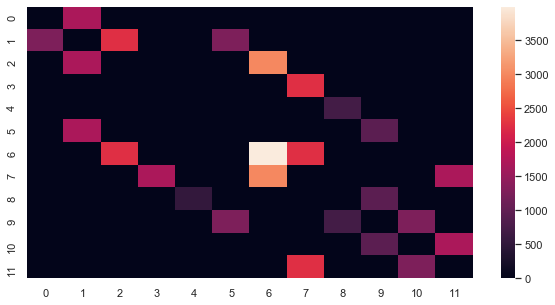

In [26]:
sns.heatmap(Q);

## Poner el modelo en Producción

In [22]:
#Crear la función final que nos devuelva la ruta óptima
def route(starting_location, ending_location):
    route = [starting_location]
    next_location = starting_location
    while(next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,:])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
    return route

In [20]:
print(route('K','G'))

['K', 'L', 'H', 'G']
